In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
from datetime import datetime

belmont = pd.read_csv("Daten/belmont.csv", sep = ';', decimal= ",")
secretariat = pd.read_csv("Daten/secretariat.csv", sep = ';')

In [2]:
print(belmont)

    Year            Winner           Jockey              Trainer  \
0   2016           Creator   Irad Ortiz, Jr       Steve Asmussen   
1   2015  American Pharoah  Victor Espinoza          Bob Baffert   
2   2014          Tonalist     Joel Rosario   Christophe Clement   
3   2013     Palace Malice       Mike Smith        Todd Pletcher   
4   2012        Union Rags   John Velazquez         Michael Matz   
..   ...               ...              ...                  ...   
86  1930       Gallant Fox       Earl Sande      Jim Fitzsimmons   
87  1929     Blue Larkspur      Mack Garner  Herbert J. Thompson   
88  1928              Vito  Clarence Kummer           Max Hirsch   
89  1927       Chance Shot       Earl Sande           Pete Coyne   
90  1926          Crusader   Albert Johnson        George Conway   

                 Owner     Time  Miliseconds    Track    miles  Unnamed: 9  
0     WinStar Farm LLC  2:28.51       148.51  Belmont  01. Mai        28.0  
1   Zayat Stables, LLC  2:26.

In [3]:
def convertToMilli(time):
    return time.minute * 6e4 + time.second * 1e3 + time.microsecond * 1e-3

milliseconds = []
seconds = []

for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time:
    milliseconds.append(convertToMilli(t))
    
for t in pd.to_datetime(belmont['Time'], format='%M:%S.%f').dt.time:
    seconds.append(convertToMilli(t))

print("milliseconds:", milliseconds)
print("seconds:", seconds)

milliseconds: [148510.0, 146650.0, 148520.0, 150700.0, 150420.0, 150880.0, 151570.0, 147540.0, 149650.0, 148740.0, 147860.0, 148750.0, 147500.0, 148260.0, 149710.0, 146560.0, 151190.0, 147880.0, 149160.0, 148820.0, 148960.0, 152020.0, 146820.0, 149970.0, 146130.0, 148100.0, 147200.0, 146000.0, 146400.0, 148200.0, 149800.0, 147000.0, 147200.0, 147800.0, 148200.0, 149000.0, 149800.0, 148600.0, 146800.0, 149600.0, 149000.0, 148200.0, 149200.0, 144000.0, 148000.0, 150400.0, 154000.0, 148800.0, 147200.0, 148800.0, 149600.0, 148400.0, 148400.0, 150200.0, 148800.0, 149200.0, 149200.0, 148400.0, 150200.0, 146600.0, 149800.0, 149000.0, 150800.0, 148600.0, 150200.0, 149000.0, 148600.0, 150200.0, 148200.0, 149400.0, 150800.0, 150200.0, 152200.0, 148200.0, 149200.0, 151000.0, 149600.0, 149600.0, 149400.0, 148600.0, 150000.0, 150600.0, 149200.0, 152600.0, 152800.0, 149600.0, 151600.0, 152800.0, 153200.0, 152400.0, 152200.0]
seconds: [148510.0, 146650.0, 148520.0, 150700.0, 150420.0, 150880.0, 15157

In [4]:
print(secretariat)

          Date        Horse  Fin Track  Distance Sf  \
0   10/28/1973  Secretariat  1st    WO   1 5/8 m  T   
1   10/08/1973  Secretariat  1st   Bel    1 1/2m  T   
2   09/29/1973  Secretariat  2nd   Bel    1 1/2m  D   
3   09/15/1973  Secretariat  1st   Bel   1 1/8 m  D   
4   08/04/1973  Secretariat  2nd   Sar   1 1/8 m  D   
5   06/30/1973  Secretariat  1st    AP   1 1/8 m  D   
6   06/09/1973  Secretariat  1st   Bel    1 1/2m  D   
7   05/19/1973  Secretariat  1st   Pim  1 3/16 m  D   
8   05/05/1973  Secretariat  1st    CD   1 1/4 m  D   
9   04/21/1973  Secretariat  3rd   Aqu   1 1/8 m  D   
10  04/07/1973  Secretariat  1st   Aqu    1 mile  D   
11  03/17/1973  Secretariat  1st   Aqu       7 f  D   
12  11/18/1972  Secretariat  1st    GS  1 1/16 m  D   
13  10/28/1972  Secretariat  1st   Lrl  1 1/16 m  D   
14  10/14/1972  Secretariat  2nd   Bel    1 mile  D   
15  09/16/1972  Secretariat  1st   Bel   6 1/2 f  D   
16  08/26/1972  Secretariat  1st   Sar   6 1/2 f  D   
17  08/16/

In [5]:
secretariat["Date"] = pd.to_datetime(secretariat["Date"], format='%m/%d/%Y')

# Alle Daten mit Secretariat auf Platz 1
ersterPlatz = secretariat[secretariat["Fin"] == "1st"]

# Datensätze nach Datum aufsteigend sortieren und resetten des Index
ersterPlatz = ersterPlatz.sort_values(by="Date", ascending=True).reset_index()

tage = 0

# Tage der Datensätze addieren 
for key, time in ersterPlatz['Date'].items():
    if (key == 0):
        continue
    tage += (time - ersterPlatz['Date'][key - 1]).days

schnitt = tage / len(ersterPlatz)

# Output of the found value
print("Die durchschnittliche Zeit zwischen zwei Siegen liegt bei", schnitt, "Tagen.")

Die durchschnittliche Zeit zwischen zwei Siegen liegt bei 29.375 Tagen.


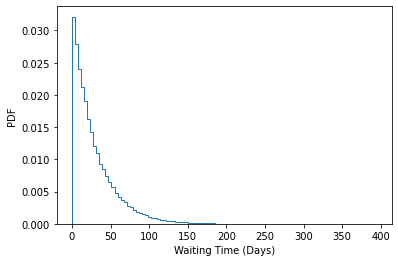

In [6]:
waitingTimeInDays = np.random.exponential(schnitt, size=100000)

# Diagramm erzeugen
_ = plt.hist(waitingTimeInDays, bins=100, histtype='step', density=True)
_ = plt.xlabel('Waiting Time (Days)')
_ = plt.ylabel('PDF')
plt.show()

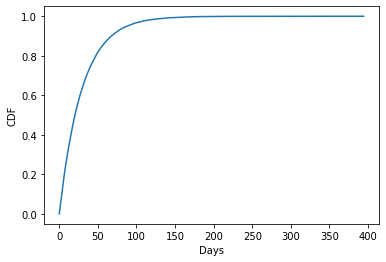

In [7]:
def cdf(df):
    """Cumulative distribution function."""
    sq = df.value_counts()
    return sq.sort_index().cumsum()*1./len(sq)

cd = cdf(pd.DataFrame(waitingTimeInDays))

# Diagramm erzeugen
_ = plt.plot(cd.index.tolist(), cd.tolist())
_ = plt.ylabel("CDF")
_ = plt.xlabel("Days")
plt.show()